<a href="https://colab.research.google.com/github/BooEazy/Project_DataScience/blob/main/Latihan/Catatan_dan_Tugas_Advanced_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note : Tugas Di Akhir Catatan

In [ ]:
from math import ceil
from statsmodels.stats.proportion import proportions_ztest, proportion_confint


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.stats.api as sms
import math

In [ ]:
# Menghitung efek ukuran berdasarkan tarif yang diharapkan
effect_size = sms.proportion_effectsize(0.13, 0.15)

# Menghitung ukuran sampel yang diperlukan
required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,  # Atur ke nilai daya yang diinginkan, misalnya, 0.8
    alpha=0.05,
    ratio=1
)

required_n = ceil(required_n)

# Menampilkan ukuran sampel yang diperlukan
print("Required sample size:", required_n)

Required sample size: 4720


## **COLLECTION AND PREPARING THE DATA**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
# Menampilkan informasi umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
# Hitung jumlah sesi untuk setiap user_id
session_counts = df['user_id'].value_counts(ascending=False)

# Hitung jumlah user yang muncul lebih dari sekali
multi_user = session_counts[session_counts > 1].count()

# Tampilkan hasil
print(f"There are {multi_user} users that appear multiple times in the dataset")

There are 3894 users that appear multiple times in the dataset


In [ ]:
# Hitung indeks user yang muncul lebih dari sekali
users_to_drop = session_counts[session_counts > 1].index

# Hapus baris dengan user_id yang muncul lebih dari sekali
df = df[~df["user_id"].isin(users_to_drop)]

# Tampilkan jumlah baris setelah penghapusan
print(f"The updated dataset now has {df.shape[0]} entries")

The updated dataset now has 286690 entries


## **SAMPLING**

Now our dataset are clean. Next we will sample our data

In [ ]:
# Ambil sampel dari grup kontrol dan perlakuan
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=123)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=123)

# Gabungkan kedua sampel menjadi DataFrame ab_test
ab_test = pd.concat([control_sample, treatment_sample], axis=0)

# Reset indeks DataFrame
ab_test.reset_index(drop=True, inplace=True)

# Tampilkan DataFrame ab_test
print(ab_test)

      user_id                   timestamp      group landing_page  converted
0      689587  2017-01-13 11:17:53.637947    control     old_page          0
1      708802  2017-01-17 06:26:13.317907    control     old_page          0
2      734166  2017-01-09 03:16:50.487997    control     old_page          0
3      679205  2017-01-21 08:14:08.970343    control     old_page          0
4      664151  2017-01-10 09:55:59.891293    control     old_page          0
...       ...                         ...        ...          ...        ...
9435   716380  2017-01-15 20:46:06.462720  treatment     new_page          0
9436   756736  2017-01-13 16:10:39.545534  treatment     new_page          1
9437   828406  2017-01-07 17:31:42.889441  treatment     new_page          0
9438   715494  2017-01-13 19:17:29.879915  treatment     new_page          0
9439   652454  2017-01-10 17:39:47.240871  treatment     new_page          0

[9440 rows x 5 columns]


In [ ]:
# Menampilkan informasi umum tentang DataFrame
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       9440 non-null   int64 
 1   timestamp     9440 non-null   object
 2   group         9440 non-null   object
 3   landing_page  9440 non-null   object
 4   converted     9440 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 368.9+ KB


In [ ]:
# Menampilkan jumlah observasi untuk setiap kelompok dalam kolom "group"
group_counts = ab_test["group"].value_counts()

# Menampilkan hasil
print(group_counts)

control      4720
treatment    4720
Name: group, dtype: int64


Great Everything went as planned

## **VISUALIZE THE RESULT**

In [ ]:
# Hitung rata-rata, deviasi standar, dan kesalahan standar dari kolom 'converted' untuk setiap kelompok
convertion_rates = ab_test.groupby("group")["converted"].agg([
    np.mean,
    np.std,
    stats.sem])

# Ganti nama kolom agar lebih deskriptif
convertion_rates.columns = ["conversion_rates", "std_deviation", "std_error"]

# Menampilkan hasil
print(convertion_rates)

           conversion_rates  std_deviation  std_error
group                                                
control            0.119068       0.323903   0.004715
treatment          0.119703       0.324649   0.004725


By looking at the stats above. It does look **like our two design performed very similarly**, with our new design performing slightly better

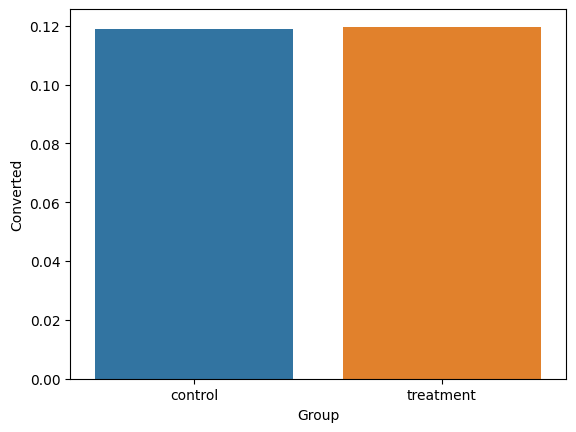

In [ ]:
# Bar plot dengan error bar (confidence interval) dinonaktifkan
sns.barplot(x=ab_test['group'], y=ab_test['converted'], errorbar=('ci', False))

# Menambahkan label pada sumbu
plt.xlabel('Group')
plt.ylabel('Converted')

# Menampilkan plot
plt.show()

## **TESTING THE HYPOTHESIS**

The last step of our anlysis is testing our hypothesis. Since we have a large sample, we could use normal approximation for calculating our *p*-value (i.e. z-test)

In [ ]:
# Jika ab_test adalah DataFrame
control_results = ab_test[ab_test['group'] == 'control']['converted']

# Menampilkan data dari kolom 'converted' untuk kelompok 'control'
print(control_results)

0       0
1       0
2       0
3       0
4       0
       ..
4715    0
4716    0
4717    0
4718    0
4719    1
Name: converted, Length: 4720, dtype: int64


In [ ]:
# Jika ab_test adalah DataFrame
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

# Menampilkan data dari kolom 'converted' untuk kelompok 'treatment'
print(treatment_results)

4720    1
4721    0
4722    0
4723    0
4724    0
       ..
9435    0
9436    1
9437    0
9438    0
9439    0
Name: converted, Length: 4720, dtype: int64


In [ ]:
# Hitung jumlah data pada kelompok kontrol
n_con = control_results.count()

# Hitung jumlah data pada kelompok perlakuan
n_treat = treatment_results.count()

# Hitung jumlah keberhasilan (converted) pada kelompok kontrol dan perlakuan
successes = [control_results.sum(), treatment_results.sum()]

# Jumlah total observasi pada kelompok kontrol dan perlakuan
nobs = [n_con, n_treat]

# Hitung z-statistic dan p-value dengan uji proporsi
z_stat, pval = proportions_ztest(successes, nobs=nobs, alternative='two-sided')

# Tampilkan hasil
print(f'z statistic: {z_stat}')
print(f'p-value: {pval}')

z statistic: -0.0952283816016755
p-value: 0.9241334271621442


## **DRAWING CONLUSIONS**

Our p-value = 0.924 is way above α = 0.05 threshold. This means that we fail to reject the null hypotesis. which means that our new design did not performe signficantly different than our old one

P-value kita sebesar 0.924 jauh di atas ambang α = 0,05. Ini berarti kita gagal menolak hipotesis null. Ini mengindikasikan bahwa desain baru kita tidak berkinerja secara signifikan berbeda dari desain lama kita.

## **Tugas_Advanced Statistics**

Studi Kasus
Tuan Fin memiliki sebuah pabrik yang memproduksi alat-alat tulis. Salah satu produk unggulan pada
perusahaan Tuan Fin adalah penggaris plastic 30cm. Plastik merupakan material yang rentan
terhadap suhu, sehingga dapat memuai/menyusut dikarenakan suhu. Maka dari itu, untuk menjaga
keakuratan produk unggulan tersebut, Tuan Fin menugaskan Head of Quality Assurance untuk
melakukan Quality Checking berkala.
Pada saat kuartal kedua, didapatkan data panjang 100 sampel penggaris. Tugas kalian adalah bantu
Tuan Fin untuk menentukan apakah penggaris yang dihasilkan pada kuartal kedua masih dapat
dikategorikan lulus Quality Checking (panjang penggaris masih di sekitar 30cm).

1. Tentukan H0 & H1 untuk studi kasus di atas
2. Tarik kesimpulan terhadap studi kasus di atas dengan menggunakan uji hipotesis. Gunakan
nilai alpha 0.05. (Gunakan library scipy)

In [ ]:
df_soal = pd.read_csv("/content/drive/MyDrive/Dataset/ruler_sample_size.csv")
df_soal.head()

,Unnamed: 0,0
0,0,29.996612
1,1,29.993937
2,2,30.008391
3,3,29.990813
4,4,29.994487


In [ ]:
# Berikan nama kolom
df_soal.columns = ["Jumlah", "Panjang_penggaris",]  # Sesuaikan dengan jumlah kolom yang sesuai
df_soal.head()

,Jumlah,Panjang_penggaris
0,0,29.996612
1,1,29.993937
2,2,30.008391
3,3,29.990813
4,4,29.994487


In [ ]:
# Nilai yang diharapkan
nilai_harapan = 30

# Tingkat signifikansi (α)
alpha = 0.05

# Uji t
t_statistic, p_value = stats.ttest_1samp(df_soal['Panjang_penggaris'], nilai_harapan)

# Print hasil uji hipotesis
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Hasil : Kita menolak hipotesis nol. Terdapat cukup bukti bahwa panjang rata-rata tidak sama dengan 30cm.")
else:
    print("Hasil : Kita tidak dapat menolak hipotesis nol. Tidak cukup bukti bahwa panjang rata-rata tidak sama dengan 30cm.")

T-statistic: -0.7673114654870471
P-value: 0.4447224776110047
Hasil : Kita tidak dapat menolak hipotesis nol. Tidak cukup bukti bahwa panjang rata-rata tidak sama dengan 30cm.


Kesimpulan : Berdasarkan sample data, tidak ada cukup bukti bahwa panjang rata-rata penggaris tidak sama dengan 30cm. Dengan nilai value lebih besar (0.4447) dari tingkatan signifikasi alpha 0.05. Dan Panjang rata-rata penggaris dari sample hanya lebih kecil 0.767 (Mungkin terpengaruh suhu)